# 第二章 异常值检验

In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
# import tensorflow as tf
# import keras
#import torch
# import catboost as cb
from pandas import read_csv
from math import sqrt
# from numpy import concatenate
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# from keras.layers.core import Dense, Activation, Dropout
%matplotlib inline

In [2]:
print(os.getcwd()) # 打印当前工作目录

E:\Research Project\DKASC, Alice Springs


In [3]:
os.listdir(os.getcwd())

['.idea',
 '.ipynb_checkpoints',
 '101-Site_DKA-WeatherStation',
 '96-Site_DKA-MasterMeter1',
 'Alice_Springs_2016-2020',
 'CNN模型训练0809.ipynb',
 'Dataset',
 'logs',
 'picture',
 'Predict',
 'Program backups',
 'temp',
 'venv',
 '异常值检验.ipynb',
 '数据集_小波包分解重构数据.ipynb',
 '数据集_预处理_第二版0702.ipynb',
 '测试小波分解.ipynb',
 '测试模型0622.ipynb',
 '测试模型0704.ipynb',
 '测试模型0704批量.ipynb',
 '测试模型小波包分解0704批量.ipynb',
 '画图.ipynb',
 '画图0704.ipynb',
 '相关性分析.ipynb',
 '笔记.ipynb',
 '训练模型0622.ipynb',
 '训练模型0702.ipynb',
 '训练模型0703 WPD.ipynb']

In [4]:
os.chdir("./Alice_Springs_2016-2020/")

In [5]:
os.listdir()

['3D.jpg',
 'Alice_Springs_2016.csv',
 'Alice_Springs_2017.csv',
 'Alice_Springs_2018.csv',
 'Alice_Springs_2019.csv',
 'Alice_Springs_2020.csv']

In [6]:
dataset1 = pd.read_csv('Alice_Springs_2016.csv')
dataset2 = pd.read_csv('Alice_Springs_2017.csv')
dataset3 = pd.read_csv('Alice_Springs_2018.csv')
dataset4 = pd.read_csv('Alice_Springs_2019.csv')

In [7]:
#查看输入数据维度
print(dataset1.shape)
print(dataset2.shape)
print(dataset3.shape)
print(dataset4.shape)

(105462, 66)
(105155, 52)
(105229, 53)
(105321, 53)


In [8]:
dataset = pd.concat([dataset1,dataset2,dataset3,dataset4],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
print(dataset.shape)

(421167, 70)


In [10]:
dataset = dataset[['Timestamp',
       'DKA.WeatherStation - Weather Temperature Celsius (°C)',
       'DKA.WeatherStation - Weather Relative Humidity (%)',
       'DKA.WeatherStation - Wind Speed (m/s)',
       'DKA.WeatherStation - Wind Direction (Degrees)',
       'DKA.WeatherStation - Weather Daily Rainfall (mm)',
       'DKA.WeatherStation - Global Horizontal Radiation (W/m²)',
       'DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²)',
       'DKA.WeatherStation - Radiation Global Tilted (W/m²)',
       'DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)',
       '1A Trina - Active Power (kW)',
       '1B Trina - Active Power (kW)', '2 eco-Kinetics - Active Power (kW)',
       '3 BP Solar - Active Power (kW)', '4 Kyocera - Active Power (kW)',
       '5 Kyocera - Active Power (kW)', '6 Kyocera - Active Power (kW)',
       '7 First Solar - Active Power (kW)', '8 Kaneka - Active Power (kW)',
       'DKA.MasterMeter1 - Active Power (kW)',
       'DKA.MasterMeter2 - Active Power (kW)']]
# print(dataset.head(5))

In [11]:
dataset.head(2)

,Timestamp,DKA.WeatherStation - Weather Temperature Celsius (°C),DKA.WeatherStation - Weather Relative Humidity (%),DKA.WeatherStation - Wind Speed (m/s),DKA.WeatherStation - Wind Direction (Degrees),DKA.WeatherStation - Weather Daily Rainfall (mm),DKA.WeatherStation - Global Horizontal Radiation (W/m²),DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²),DKA.WeatherStation - Radiation Global Tilted (W/m²),DKA.WeatherStation - Radiation Diffuse Tilted (W/m²),...,1B Trina - Active Power (kW),2 eco-Kinetics - Active Power (kW),3 BP Solar - Active Power (kW),4 Kyocera - Active Power (kW),5 Kyocera - Active Power (kW),6 Kyocera - Active Power (kW),7 First Solar - Active Power (kW),8 Kaneka - Active Power (kW),DKA.MasterMeter1 - Active Power (kW),DKA.MasterMeter2 - Active Power (kW)
0,2016/1/1 0:00,17.176111,87.095665,2.421402,186.941284,0.0,2.672255,1.103375,1.868883,1.853108,...,0.0,0.000133,0.0004,0.0,0.0,-0.02,0.0002,0.0,NaN,-0.233352
1,2016/1/1 0:05,17.133446,87.671669,2.688986,191.876770,0.0,2.703700,1.152340,1.803461,1.796472,...,0.0,0.000200,0.0004,0.0,0.0,-0.02,0.0002,0.0,NaN,-0.243912


In [12]:
#电站和气象数据重命名
dataset.rename(columns={
       'DKA.WeatherStation - Weather Temperature Celsius (°C)':'Temperature(°C)',
       'DKA.WeatherStation - Weather Relative Humidity (%)':'Relative Humidity(%)',
       'DKA.WeatherStation - Wind Speed (m/s)':'Wind Speed(m/s)',
       'DKA.WeatherStation - Wind Direction (Degrees)':'Wind Direction(Degrees)',
       'DKA.WeatherStation - Weather Daily Rainfall (mm)':'Daily Rainfall(mm)',
       'DKA.WeatherStation - Global Horizontal Radiation (W/m²)':'Global Horizontal Radiation(W/m²)',
       'DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²)':'Diffuse Horizontal Radiation(W/m²)',
       'DKA.WeatherStation - Radiation Global Tilted (W/m²)':'Radiation Global Tilted(W/m²)',
       'DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)':'Radiation Diffuse Tilted(W/m²)',
       '1A Trina - Active Power (kW)':'1A Trina_power',
       '1B Trina - Active Power (kW)':'1B Trina_power',
       '2 eco-Kinetics - Active Power (kW)':'2 eco_power',
       '3 BP Solar - Active Power (kW)':'3 BP_power',
       '4 Kyocera - Active Power (kW)':'4 Kyocera_power',
       '5 Kyocera - Active Power (kW)':'5 Kyocera_power',
       '6 Kyocera - Active Power (kW)':'6 Kyocera_power',
       '7 First Solar - Active Power (kW)':'7 First_power',
       '8 Kaneka - Active Power (kW)':'8 Kaneka_power',
       'DKA.MasterMeter1 - Active Power (kW)':'DKA.Meter1_power',
       'DKA.MasterMeter2 - Active Power (kW)':'DKA.Meter2_power'},inplace=True)

# dataset.columns

In [13]:
dataset.head(2)

,Timestamp,Temperature(°C),Relative Humidity(%),Wind Speed(m/s),Wind Direction(Degrees),Daily Rainfall(mm),Global Horizontal Radiation(W/m²),Diffuse Horizontal Radiation(W/m²),Radiation Global Tilted(W/m²),Radiation Diffuse Tilted(W/m²),...,1B Trina_power,2 eco_power,3 BP_power,4 Kyocera_power,5 Kyocera_power,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power
0,2016/1/1 0:00,17.176111,87.095665,2.421402,186.941284,0.0,2.672255,1.103375,1.868883,1.853108,...,0.0,0.000133,0.0004,0.0,0.0,-0.02,0.0002,0.0,NaN,-0.233352
1,2016/1/1 0:05,17.133446,87.671669,2.688986,191.876770,0.0,2.703700,1.152340,1.803461,1.796472,...,0.0,0.000200,0.0004,0.0,0.0,-0.02,0.0002,0.0,NaN,-0.243912


In [14]:
print('训练集初始维度：',dataset.shape)
dataset.dropna(axis="columns", how='all', inplace=True)  #删除掉训练集全是空值的列
dataset.dropna(axis="index", how='all', inplace=True)   #删除掉训练集全是空值的行
print('训练集去除全空维度：',dataset.shape)
# dataset

训练集初始维度： (421167, 21)
训练集去除全空维度： (421167, 21)


In [15]:
dataset.columns

Index(['Timestamp', 'Temperature(°C)', 'Relative Humidity(%)',
       'Wind Speed(m/s)', 'Wind Direction(Degrees)', 'Daily Rainfall(mm)',
       'Global Horizontal Radiation(W/m²)',
       'Diffuse Horizontal Radiation(W/m²)', 'Radiation Global Tilted(W/m²)',
       'Radiation Diffuse Tilted(W/m²)', '1A Trina_power', '1B Trina_power',
       '2 eco_power', '3 BP_power', '4 Kyocera_power', '5 Kyocera_power',
       '6 Kyocera_power', '7 First_power', '8 Kaneka_power',
       'DKA.Meter1_power', 'DKA.Meter2_power'],
      dtype='object')

In [16]:
print('训练集初始维度：',dataset.shape)
dataset.dropna(axis="index",thresh=16 , inplace=True)  #删除掉全是空值的行
dataset.dropna(axis="columns", how='all', inplace=True)  #删除掉全是空值的列
print('训练集去除全空维度：',dataset.shape)

训练集初始维度： (421167, 21)
训练集去除全空维度： (417722, 21)


In [17]:
# fillcolumns=['Temperature(°C)', 'Relative Humidity(%)',
#        'Wind Speed(m/s)', 'Wind Direction(Degrees)', 'Daily Rainfall(mm)',
#        'Global Horizontal Radiation(W/m²)',
#        'Diffuse Horizontal Radiation(W/m²)', 'Radiation Global Tilted(W/m²)',
#        'Radiation Diffuse Tilted(W/m²)', '1A Trina_power', '1B Trina_power',
#        '2 eco_power', '3 BP_power', '4 Kyocera_power', '5 Kyocera_power',
#        '6 Kyocera_power', '7 First_power', '8 Kaneka_power',
#        'DKA.Meter1_power', 'DKA.Meter2_power']
# for i in fillcolumns:
#     dataset[i] = dataset[i].fillna(method='ffill')
# #     print("训练集",i,"列去掉全空")
#     print(dataset.loc[dataset[i].isnull(),:])

In [18]:
print('训练集初始维度：',dataset.shape)
dataset.dropna(axis=0, how='any', inplace=True)
print('训练集去除全空维度：',dataset.shape)

训练集初始维度： (417722, 21)
训练集去除全空维度： (180831, 21)


In [19]:
# dataset = dataset.drop(['Wind Speed(m/s)','Radiation Global Tilted(W/m²)',
#        'Radiation Diffuse Tilted(W/m²)'],axis=1)

In [20]:
strsplit = dataset.Timestamp.str.split(expand = True)
strsplit.rename(columns={0:'date',1:'time'},inplace=True)
date = strsplit.date.str.split(expand = True,pat='/')
date.rename(columns={0:'Year',1:'Month',2:'Day'},inplace=True)
time = strsplit.time.str.split(expand = True,pat=':')
#time.rename(columns = {0:'H',1:'M',2:'S'},inplace = True)
time.rename(columns = {0:'Hour',1:'Minutes'},inplace = True)
dataset = pd.concat([dataset,date,time],axis=1)
dataset.columns

Index(['Timestamp', 'Temperature(°C)', 'Relative Humidity(%)',
       'Wind Speed(m/s)', 'Wind Direction(Degrees)', 'Daily Rainfall(mm)',
       'Global Horizontal Radiation(W/m²)',
       'Diffuse Horizontal Radiation(W/m²)', 'Radiation Global Tilted(W/m²)',
       'Radiation Diffuse Tilted(W/m²)', '1A Trina_power', '1B Trina_power',
       '2 eco_power', '3 BP_power', '4 Kyocera_power', '5 Kyocera_power',
       '6 Kyocera_power', '7 First_power', '8 Kaneka_power',
       'DKA.Meter1_power', 'DKA.Meter2_power', 'Year', 'Month', 'Day', 'Hour',
       'Minutes'],
      dtype='object')

In [21]:
# # #数据类型转换
dataset[['Year', 'Month','Day','Hour','Minutes']] = dataset[['Year', 'Month','Day','Hour','Minutes']].astype(int)
# test[['Year', 'Month','Day','Hour','Minutes']] = test[['Year', 'Month','Day','Hour','Minutes']].astype(int)

# #丢弃
dataset = dataset.drop(dataset[(dataset.Hour < 7) | (dataset.Hour > 18)].index)
# test = test.drop(test[(test.Hour < 7) | (test.Hour > 18)].index)


In [22]:
dataset.shape

(81847, 26)

In [23]:
# dataset = dataset.drop(['Timestamp','DKA.Meter1_power'],axis=1)

In [24]:
dataset.head(2)

,Timestamp,Temperature(°C),Relative Humidity(%),Wind Speed(m/s),Wind Direction(Degrees),Daily Rainfall(mm),Global Horizontal Radiation(W/m²),Diffuse Horizontal Radiation(W/m²),Radiation Global Tilted(W/m²),Radiation Diffuse Tilted(W/m²),...,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power,Year,Month,Day,Hour,Minutes
26296,2016/4/1 7:00,12.006018,57.644600,0.493576,158.137421,0.0,11.729965,9.552049,20.626051,10.992537,...,-0.019967,0.000133,0.057033,0.861282,0.171209,2016,4,1,7,0
26297,2016/4/1 7:05,12.340275,54.618759,0.482336,225.061218,0.0,12.322770,10.344152,41.923687,12.609080,...,-0.020000,-0.000067,0.080533,3.007778,0.589261,2016,4,1,7,5


In [25]:
# # 设定索引为日期，方便按日期筛选
# dataset.set_index('Timestamp', inplace=True,drop=True)

In [26]:
# datase = dataset.values
# datase = dataset.astype('float32')     # 将整型变为float
# scaler = MinMaxScaler(feature_range=(0, 1)) # 数据处理，归一化至0~1之间
# datase = scaler.fit_transform(datase)

In [27]:
dataset.shape

(81847, 26)

In [28]:
def localoutlierfactor(data, predict, k):
    from sklearn.neighbors import LocalOutlierFactor
    clf = LocalOutlierFactor(n_neighbors=k + 1, algorithm='auto', contamination=0.1, n_jobs=-1)
    clf.fit(data)
    # 记录 k 邻域距离
    predict['k distances'] = clf.kneighbors(predict)[0].max(axis=1)
    # 记录 LOF 离群因子，做相反数处理
    predict['local outlier factor'] = -clf._decision_function(predict.iloc[:, :-1])
    return predict

def plot_lof(result, method):
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    plt.figure(figsize=(8, 4)).add_subplot(111)
    plt.scatter(result[result['local outlier factor'] > method].index,
                result[result['local outlier factor'] > method]['local outlier factor'], c='red', s=50,
                marker='.', alpha=None,
                label='离群点')
    plt.scatter(result[result['local outlier factor'] <= method].index,
                result[result['local outlier factor'] <= method]['local outlier factor'], c='black', s=50,
                marker='.', alpha=None, label='正常点')
    plt.hlines(method, -2, 2 + max(result.index), linestyles='--')
    plt.xlim(-2, 2 + max(result.index))
    plt.title('LOF局部离群点检测', fontsize=13)
    plt.ylabel('局部离群因子', fontsize=15)
    plt.legend()
    plt.show()

def lof(data, predict=None, k=5, method=1, plot=False):
    import pandas as pd
    # 判断是否传入测试数据，若没有传入则测试数据赋值为训练数据
    try:
        if predict == None:
            predict = data.copy()
    except Exception:
        pass
    predict = pd.DataFrame(predict)
    # 计算 LOF 离群因子
    predict = localoutlierfactor(data, predict, k)
    if plot == True:
        plot_lof(predict, method)
    # 根据阈值划分离群点与正常点
    outliers = predict[predict['local outlier factor'] > method].sort_values(by='local outlier factor')
    inliers = predict[predict['local outlier factor'] <= method].sort_values(by='local outlier factor')
    return outliers, inliers

In [29]:
# data=pd.DataFrame(datase)
# data.columns = ['Temperature(°C)', 'Relative Humidity(%)', 'Wind Speed(m/s)',
#        'Wind Direction(Degrees)', 'Daily Rainfall(mm)',
#        'Global Horizontal Radiation(W/m²)',
#        'Diffuse Horizontal Radiation(W/m²)', 'Radiation Global Tilted(W/m²)',
#        'Radiation Diffuse Tilted(W/m²)', '1A Trina_power', '1B Trina_power',
#        '2 eco_power', '3 BP_power', '4 Kyocera_power', '5 Kyocera_power',
#        '6 Kyocera_power', '7 First_power', '8 Kaneka_power',
#        'DKA.Meter2_power', 'Year', 'Month', 'Day', 'Hour', 'Minutes']

In [30]:
dataset.columns

Index(['Timestamp', 'Temperature(°C)', 'Relative Humidity(%)',
       'Wind Speed(m/s)', 'Wind Direction(Degrees)', 'Daily Rainfall(mm)',
       'Global Horizontal Radiation(W/m²)',
       'Diffuse Horizontal Radiation(W/m²)', 'Radiation Global Tilted(W/m²)',
       'Radiation Diffuse Tilted(W/m²)', '1A Trina_power', '1B Trina_power',
       '2 eco_power', '3 BP_power', '4 Kyocera_power', '5 Kyocera_power',
       '6 Kyocera_power', '7 First_power', '8 Kaneka_power',
       'DKA.Meter1_power', 'DKA.Meter2_power', 'Year', 'Month', 'Day', 'Hour',
       'Minutes'],
      dtype='object')

In [31]:
# GHR = np.array((dataset['Global Horizontal Radiation(W/m²)'][:]+ dataset['Radiation Global Tilted(W/m²)'][:])/2)  # 经度
# GHR = np.array(dataset['Global Horizontal Radiation(W/m²)'][:])  # 水平辐照度
RGT = np.array(dataset['Radiation Global Tilted(W/m²)'][:]) #全球倾角辐照度
Power = np.array(dataset['DKA.Meter1_power'][:])  # 纬度
# A = list(zip(GHR, Power))  # 按水平辐照度-出力功率匹配
A = list(zip(RGT, Power))  # 倾角辐照度-出力功率匹配

In [32]:
# outliers1, inliers1 = lof(A, k=3, method = 2)

In [33]:
for k in [3,5,10]:
    outliers1, inliers1 = lof(A, k=k, method = 2)
    print(outliers1.shape)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(44, 4)
(38, 4)
(56, 4)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


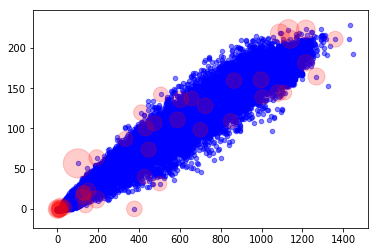

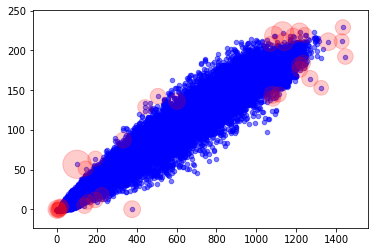

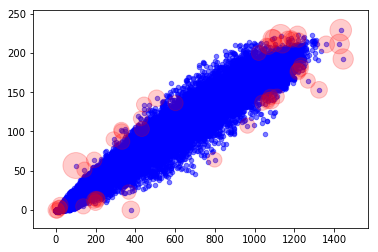

In [34]:
import matplotlib.pyplot as plt
for k in [3,5,10]:
    plt.figure('k=%d'%k)
#     plt.rcParams['font.sans-serif']=['FangSong'] 
    outliers1, inliers1 = lof(A, k=k, method = 2)
    plt.scatter(np.array(A)[:,0],np.array(A)[:,1],s = 20,c='b',alpha = 0.5)
    plt.scatter(outliers1[0],outliers1[1],s = 10+outliers1['local outlier factor']*100,c='r',alpha = 0.2)
#     plt.title('k=%d' % k,fontsize=14)
#     plt.xlabel('全球水平辐照度',fontsize=14)
#     plt.ylabel('光伏出力功率',fontsize=14)
#     plt.savefig('../picture/全球水平辐射异常104k=%d.jpg'%k,dpi=300)
    plt.savefig('../picture/全球倾角辐射异常104k=%d.jpg'%k,dpi=300)
#     plt.savefig('../picture/全球水平辐射异常104k=%d.pdf'%k,format="pdf",dpi=300)
    plt.show()